Engy-5050 Spring 2022 UMass Lowell; Prof. V. F. de Almeida **14Jan2022**

# 08. Bare Fuel Cylinder Criticality

$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Dmtrx}{\boldsymbol{\mathsf{D}}}
  \newcommand{\Gmtrx}{\boldsymbol{\mathsf{G}}}
  \newcommand{\Hmtrx}{\boldsymbol{\mathsf{H}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
  \newcommand{\Ecal}{\mathscr{E}}
  \newcommand{\Lcal}{\mathscr{L}}
  \newcommand{\Dcal}{\mathscr{D}}
$

## Table of Contents<a id="toc"></a>
* [Objectives](#obj)
1. [Poisson Problem with Symmetry/Dirichlet Boundary Conditions](#poisson-1)
1. [Associated Eigenvalue Problem](#eigen-1)
1. [Rayleigh-Ritz or Galerkin's Method w/ Finite Element Basis Functions](#fem-1)
   + [Data](#data-1)
   + [Finite Element Lagrange Basis Functions](#fembf-1)
   + [Results](#results-1)
   + [Criticality](#criticality-1)
     - [Data](#datac-1)
     - [Results](#resultsc-1)
1. [Poisson Problem with Symmetry/Robin Boundary Conditions](#poisson-2)
1. [Associated Eigenvalue Problem](#eigen-2)
1. [Rayleigh-Ritz or Galerkin's Method w/ Finite Element Basis Functions](#fem-2)
   + [Data](#data-2)
   + [Finite Element Lagrange Basis Functions](#fembf-2)
   + [Results](#results-2)
     - [Data](#datac-2)
     - [Results](#resultsc-2)

## [Objectives](#toc)<a id="obj"></a>

 + Solve the 1-D cylindrical coordinates, neutron diffusion criticality problem in a bare cylinder.
 + Carry out the same analysis done for the bare slab notebook (required reading).

## [Poisson Problem with Symmetry/Dirichlet Boundary Conditions](#toc)<a id="poisson-1"></a>

Solve the spatial neutron flux intensity criticality (steady state) problem. Find $u:[0,r_b]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\frac{1}{r}\bigl(-D\, r\,u'\bigr)' + \bigl(\nu\Sigma_f - \Sigma_a\bigr)\,u &= 0 \quad\text{in}\quad ]0,r_b[, \\
 u'(a) &= 0, \\
 u(r_b) &= 0.
\end{align*}
   
Given data: diffusion coefficient, $D$, macroscopic fission cross section, $\Sigma_f$, average number of neutrons per fission, $\nu$, and macroscopic absorption cross section, $\Sigma_a$.

## [Eigenvalue Problem Statement](#toc)<a id="eigen-1"></a>

Introducing the factor $k$ (neutron multiplication factor), the Poisson operator $\Dcal$ can be made singular, therefore non-zero solutions can be obtained from solving the neutron flux intensity criticality problem. Find $u:[0,r_b]\subset\Reals\rightarrow\Reals$ and $k \in \Reals$ such that:

\begin{align*}
 -\frac{1}{r}\bigl(-D\, r\, u'\bigr)' + \bigl(k^{-1}\nu\Sigma_f - \Sigma_a\bigr)\,u &= 0 \quad\text{in}\quad ]0,r_b[, \\
 u'(0) &= 0, \\
 u(r_b) &= 0.
\end{align*}
   
Given data: diffusion coefficient, $D$, macroscopic fission cross section, $\Sigma_f$, average number of neutrons per fission, $\nu$, and macroscopic absorption cross section, $\Sigma_a$.

## [Rayleigh-Ritz or Galerkin Finite Element Method](#toc)<a id="fem-1"></a>

The Rayleigh-Ritz method for computing an approximate solution to the above mentioned Poisson problem is: find $u^*_N \in V_N(a,b)\subset V(a,b) = \bigl\{ u:[a,b]\subset\Reals\rightarrow\Reals \bigr\}$ such that it minimizes the Poisson energy norm:

\begin{equation*}
  \norm{u-u^*_N}^2_{\Ecal} = \min\limits_{u_N\, \in\, V_N} \norm{u-u_N}^2_{\Ecal},
\end{equation*}

where 
$V_N(0,r_b) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \mid u_N(b) = 0, (u'_N,u'_N) + (u_N,u_N) < \infty \bigr\}$
and $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(a,b)$.

The optimum coefficients $\cvec^* := \{c_i\mid i=1,\ldots,N\}$ solve

\begin{equation*}
  \overset{(N\times N)}{\Amtrx} \,\overset{(N\times 1)}{\cvec^*}  = 
  \biggl(\overset{(N\times N)}{\Dmtrx} - \lambda\,\overset{(N\times N)}{\Gmtrx}\biggr)\,\overset{(N\times 1)}{\cvec^*} = \overset{(N\times 1)}\zerovec ,
\end{equation*}

where:
  + $A_{i,j} = D\,(\phi'_j,\phi'_i) - \lambda\,(\phi_j,\phi_i)$
  
and $\lambda = k^{-1}\nu\Sigma_f - \Sigma_a$ or $k = \frac{\nu\Sigma_f}{\lambda + \Sigma_a}$.
  
This formulation only accommodates basis functions that satisfy the homogeneous boundary conditions. The problem is referred to as a *generalized eigenvalue problem*. In addition, in cylindrical coordinates, the inner products read

\begin{align*}
D\,\bigl(\phi_j',\phi_i'\bigr) &= D\int\limits_0^{R_\infty} \phi_i'(r)\,\phi_j'(r)\, r\,dr  \\
\lambda\,\bigl(\phi_i,\phi_j\bigr) &= \lambda\int\limits_0^{R_\infty} \phi_i(r)\,\phi_j(r)\,r\,dr \\
\end{align*}

### [Data](#toc)<a id="data-1"></a>

Solve problem with parameter values:

> + a = 0 cm
> + b = 10.0 cm
> + D = 1.44 cm
> + $\Sigma_f$ = 0.1 cm^-1
> + $\Sigma_a$ = $1.20\,\Sigma_f$
> + $\nu$ = 2.4355

In [1]:
'''SI units'''
from scipy import constants as unit
unit.second = 1.0
unit.meter = 1.0
unit.cm = unit.centi*unit.meter

In [2]:
'''Domain'''
r_a = 0*unit.cm
r_b = 10*unit.cm

In [3]:
'''Parameters and data'''
diffusion_coeff_fuel = 1.44*unit.cm
sigma_f_fuel = 0.1/unit.cm
sigma_a_fuel = sigma_f_fuel * 1.20 #20% increase from fission
nu = 2.4355 # average # of neutrons per fission
# sanity check
assert sigma_a_fuel >= sigma_f_fuel

### [Finite Element Basis Functions](#toc)<a id="fembf-1"></a>

Specify basis functions distribution on the material domain and degree.

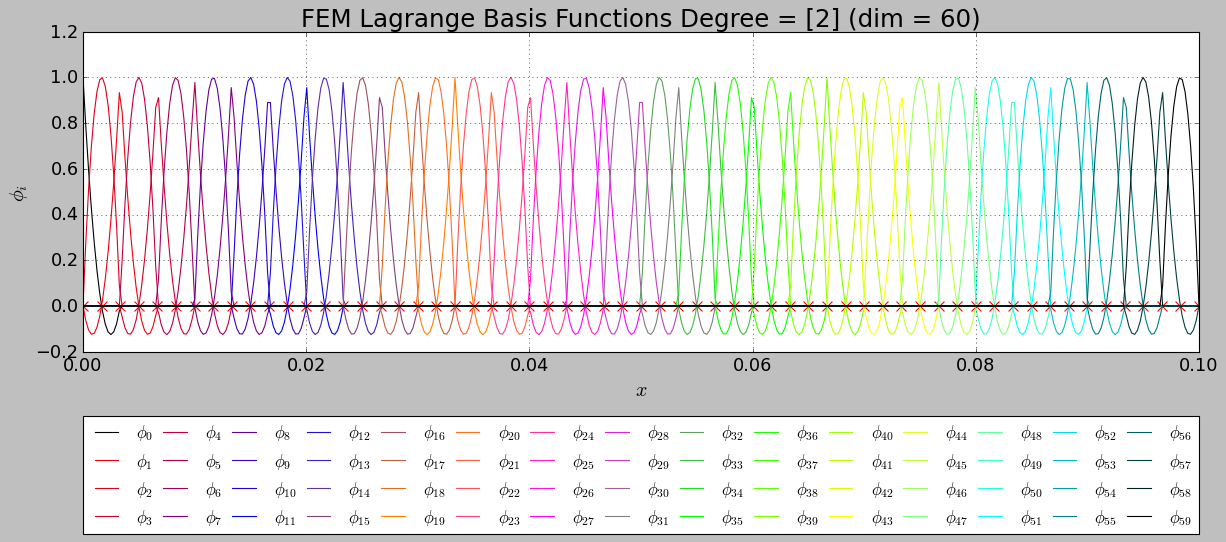

In [4]:
'''Build the basis functions'''

from pyfem1d.toolkit import LagrangeFEMBasis 

degree = 2
n_elem = [30] 

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[r_a, r_b], bc_x_max='dirichlet')
femlb.plot(n_plot_pts=400, n_legend_cols=15)

  + $A_{i,j} = D\,(\phi'_j,\phi'_i) - \lambda\,(\phi_j,\phi_i)$

In [5]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(lambda x: diffusion_coeff_fuel, "u'", "v'", coord_sys='cylindrical')
g_mtrx = femlb.inner_product_matrix(lambda x:1.0, 'u', 'v', coord_sys='cylindrical')

In [6]:
try:    
    from pyfem1d.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(d_mtrx, tol=1e-5) == d_mtrx.shape[1]:
    print('D is full rank.')
else:
    print('D is rank deficient.')

if matrix_rank(g_mtrx, tol=1e-7) == g_mtrx.shape[1]:
    print('G is full rank.')
else:
    print('G is rank deficient.')

D is full rank.
G is full rank.


In [7]:
'''Compute optimal coefficient eigenvectors'''
import scipy
lambda_vec, eigen_vec = scipy.linalg.eigh(d_mtrx, g_mtrx) # this solves D x = lambda G x

In [8]:
import numpy as np
np.set_printoptions(precision=5)
print('lambda [cm^-1] = ', lambda_vec[:5]*unit.cm)
print('Buckling (material) = ', np.sqrt(lambda_vec[:5]/diffusion_coeff_fuel))

lambda [cm^-1] =  [0.08328 0.43879 1.07838 2.00223 3.21046]
Buckling (material) =  [ 24.04826  55.20081  86.5376  117.91694 149.31455]


In [9]:
'''Eigenvalues'''
import numpy as np
k_vec = nu*sigma_f_fuel/(lambda_vec+sigma_a_fuel)
np.set_printoptions(precision=5)
print('k = ',k_vec[:5])

k =  [1.19811 0.43586 0.20323 0.11476 0.07313]


In [10]:
'''Double checking operator singularity (only first 5 eigenvalues)'''
for k in k_vec[:5]:
    l_mtrx = d_mtrx - (nu*sigma_f_fuel/k - sigma_a_fuel)*g_mtrx
    if np.linalg.matrix_rank(l_mtrx) != l_mtrx.shape[1]:
        print('Singular matrix')

Singular matrix
Singular matrix
Singular matrix
Singular matrix
Singular matrix


In [11]:
'''Probability of non-leakage'''
p_nl = sigma_a_fuel / (lambda_vec[0] + sigma_a_fuel)
print('P_NL = ', p_nl)

P_NL =  0.5903249279260004


In [12]:
'''k_oo'''
k_oo = k_vec[0]/p_nl
print('k_oo = ', k_oo)

k_oo =  2.0295833333333335


### [Results](#toc)<a id="results-1"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

In [13]:
'''Build the best approximation function in V_N'''

def u_star(x, c_star_vec):
    u_0 = femlb.evaluation_matrix(x)@c_star_vec
    return u_0

In [14]:
'''Build the derivative '''

def u_prime_star(x, c_star_vec):
    u_0 = femlb.evaluation_matrix(x, derivative=True)@c_star_vec
    return u_0

In [15]:
'''Build the best approximation function in V_N'''

def u_flux_x(x, c_star_vec):
    return -diffusion_coeff_fuel*u_prime_star(x, c_star_vec)

In [16]:
'''Table of results for the fundamental mode'''

x_table = np.linspace(r_a, r_b, 20)

# Normalized eigenvector
c_star_vec = eigen_vec[:,0]/scipy.linalg.norm(eigen_vec[:,0])

# Note that u values are only determined up to a multiplying factor
u_values = u_star(x_table, c_star_vec)

(normalizing_val, ) = np.where(np.abs(u_values) == np.abs(u_values).max())
u_norm_factor = u_values[normalizing_val[0]]
u_values /= u_values[normalizing_val[0]]

flux_values = u_flux_x(x_table, c_star_vec)

(normalizing_val, ) = np.where(np.abs(flux_values) == np.abs(flux_values).max())
flux_norm_factor = flux_values[normalizing_val[0]]
flux_values /= flux_norm_factor

print('k = %2.5e'%k_vec[0])
print('')

print("   x [cm]        u [a.u.]      -D u'_x [a.u.]")
for i,(x,t,q)in enumerate(zip(x_table, u_values, flux_values)):
    print('%2i)'%(i+1), ' %2.2f'%(x/unit.cm), '       %3.5f'%t, '      %3.5f'%q)
    
print('u normalization value [#/cm^2-s] = %2.8e'%(u_norm_factor*unit.cm**2))
print('q normalization value [#/cm^2-s] = %2.8e'%(flux_norm_factor*unit.cm**2))

k = 1.19811e+00

   x [cm]        u [a.u.]      -D u'_x [a.u.]
 1)  0.00        1.00000       0.00002
 2)  0.53        0.99600       0.10866
 3)  1.05        0.98404       0.21608
 4)  1.58        0.96428       0.32083
 5)  2.11        0.93694       0.42175
 6)  2.63        0.90235       0.51778
 7)  3.16        0.86093       0.60730
 8)  3.68        0.81318       0.69011
 9)  4.21        0.75965       0.76410
10)  4.74        0.70098       0.82950
11)  5.26        0.63786       0.88501
12)  5.79        0.57104       0.93003
13)  6.32        0.50129       0.96476
14)  6.84        0.42943       0.98751
15)  7.37        0.35627       0.99975
16)  7.89        0.28266       1.00000
17)  8.42        0.20943       0.98936
18)  8.95        0.13738       0.96784
19)  9.47        0.06732       0.93541
20)  10.00        -0.00000       0.89366
u normalization value [#/cm^2-s] = -1.85989913e-05
q normalization value [#/cm^2-s] = -3.74287919e-06


In [17]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u_N(a) = ', -u_star(0, c_star_vec), ' u_N(b) = ', -u_star(r_b, c_star_vec))

u_N(a) =  [0.18599]  u_N(b) =  [-0.]


In [18]:
left_flux = (u_flux_x(0, c_star_vec)[0], 0.0)
normal = np.array((-1,0))

left_normal_flux = np.dot(np.array(left_flux), normal)
print('left normal diff. flux =', left_normal_flux)

left normal diff. flux = 8.29130453689686e-07


In [19]:
right_flux = (u_flux_x(r_b, c_star_vec)[0], 0.0)
normal = np.array((1,0))

right_normal_flux = np.dot(np.array(right_flux), normal)
print('right normal diff. flux =', right_normal_flux)

right normal diff. flux = -0.03344876333572481


In [20]:
'''Total power (integrated source in cylindrical coordinates)'''
from scipy.integrate import quad
source = lambda x: lambda_vec[0] * u_star(x, c_star_vec) * x
(total_power, _) = quad(source, r_a, r_b)
print('integrated source =', total_power)

integrated source = -0.0033436902277357928


In [21]:
'''Total flux balance'''

print('Total flux balance relative error [%%] = %2.2f '%((left_normal_flux * 0 + right_normal_flux * r_b - total_power)/total_power*100))

Total flux balance relative error [%] = 0.04 


In [22]:
'''Plot neutron flux modes'''
from pyfem1d.toolkit import color_map

def plot_modes(k_vec, eigen_vec):

    k_vec = k_vec.round(5)
    n_pts = 300
    x = np.linspace(r_a, r_b, n_pts)
    
    
    import matplotlib.pyplot as plt
    plt.style.use('classic')
    (fig, ax1) = plt.subplots(1, figsize=(14, 5))
    ax2 = ax1.twinx()
    
    colors = color_map(k_vec.shape[0])

    for j,k in enumerate(k_vec):
        c_star_vec = eigen_vec[:,j]/scipy.linalg.norm(eigen_vec[:,j])
        
        u_values = u_star(x, c_star_vec)
        (normalizing_val, ) = np.where(np.abs(u_values) == np.abs(u_values).max())
        u_values /= u_values[normalizing_val[0]]

        u_flux_x_values = u_flux_x(x, c_star_vec)
        (normalizing_val, ) = np.where(np.abs(u_flux_x_values) == np.abs(u_flux_x_values).max())
        u_flux_x_values /= u_flux_x_values[normalizing_val[0]]

        ax1.plot(x/unit.cm, u_values, '-', label=r'Solution $k$=%2.2f'%k, color=colors[j])
        
        ax1.set_xlabel(r'$x$ [cm]', fontsize=18)
        ax1.set_ylabel(r'$u_N$ [a.u.]', fontsize=18, color='black')
        ax1.tick_params(axis='y', labelcolor='black', labelsize=16)
        ax1.tick_params(axis='x', labelsize=16)
        ax1.legend(loc='upper left', fontsize=12)
        ax1.grid(True)
        
        ax2.plot(x/unit.cm, u_flux_x_values,'--', color=colors[j], label='Flux $k$=%2.2f'%k)

        ax2.set_ylabel(r"$-D\,u'_N$ [a.u.]", fontsize=16, color='black')
        ax2.tick_params(axis='y', labelcolor='black', labelsize=16)
        ax2.legend(loc='upper right', fontsize=12)
        
    plt.title(r'Bare Fuel Slab Modes ($k$=%s # elem=%s, N=%i)'%(k_vec,n_elem,len(femlb.basis_func_list)), fontsize=20)
    plt.show()

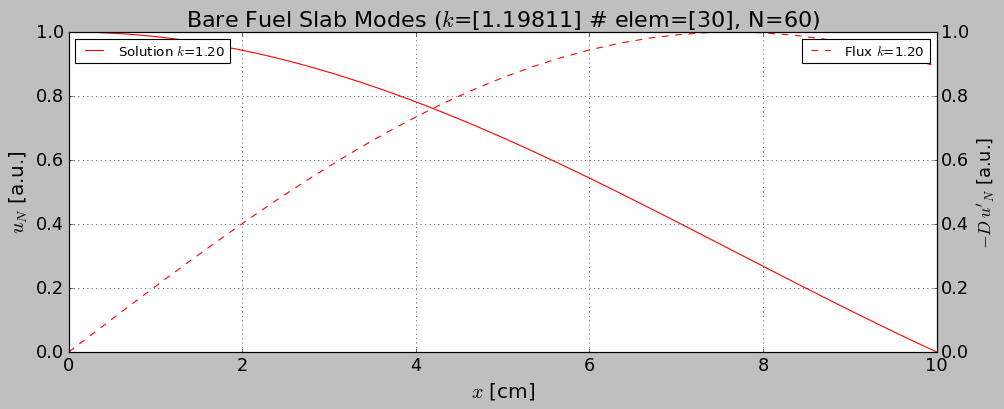

In [23]:
plot_modes(k_vec[0:1], eigen_vec[:,0:1])

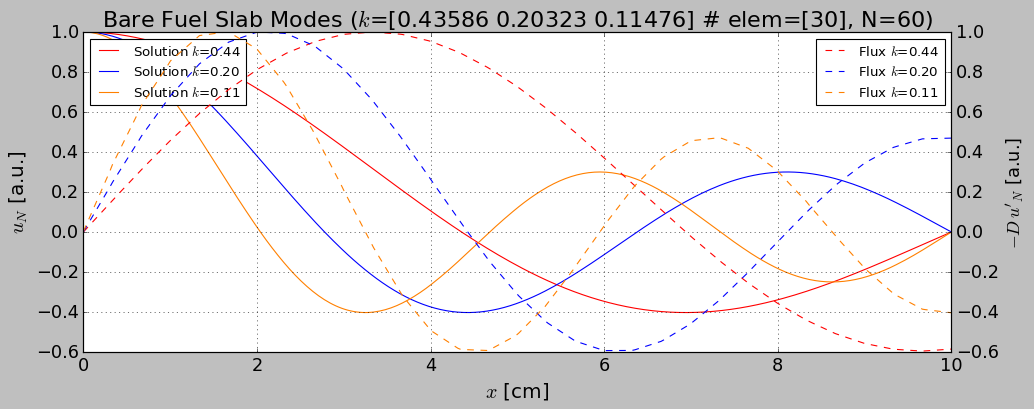

In [24]:
plot_modes(k_vec[1:4], eigen_vec[:,1:4])

In [25]:
'''Sigma_f critical'''
sigma_f_fuel_critical = sigma_f_fuel / k_vec[0]
print('Sigma_f critical = %2.4e [1/cm]'%(sigma_f_fuel_critical*unit.cm))

Sigma_f critical = 8.3465e-02 [1/cm]


### [Criticality](#toc)<a id="criticality-1"></a>
Use the adjusted $\Sigma_{fc}$ to verify the solution is critical.

#### [Data](#toc)<a id="datac-1"></a>

Solve problem with the modified parameter:

> + $\Sigma_{fc}$

*Assume all other parameters to remain the same.* This assumption is unlikely to hold because $D$ will likely change and an iterative process must be used even for this simple problem.


#### [Results](#toc)<a id="resultsc-1"></a>

Multiplication factor of the critical solution.

In [26]:
'''Compute the new multiplication factor'''
k_vec = nu*sigma_f_fuel_critical/(lambda_vec+sigma_a_fuel)

In [27]:
'''Eigenvalues'''
import numpy as np
np.set_printoptions(precision=5)
print('k = ',k_vec[:5])

k =  [1.      0.36378 0.16963 0.09578 0.06104]


## [Poisson Problem with Symmetry/Robin Boundary Conditions](#toc)<a id="poisson-2"></a>

Solve the spatial neutron flux intensity criticality (steady state) problem. Find $u:[0,r_b]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\frac{1}{r}\bigl(-D\, r\, u'\bigr)'(x) + \bigl(\frac{1}{k}\nu\Sigma_f - \Sigma_a\bigr)\,u(r) &= 0 \quad\quad \forall \quad\quad x\in\ ]0,r_b[, \\
 u'(0) &= 0, \\
 q_n(r_b) &= \frac{D}{\delta}\,u(r_b).
\end{align*}
   
Given data: diffusion coefficient, $D$, macroscopic fission cross section, $\Sigma_f$, average number of neutrons per fission, $\nu$, neutron multiplication factor, $k$, macroscopic absorption cross section, $\Sigma_a$, and the extrapolation distance, $\delta$, in the $r$ direction.

This problem is analogous to the previous one with Dirichlet boundary condition. That is, if the operator $\Dcal(\cdot)$ is non-singular, there exists only the trivial solution.

## [Rayleigh-Ritz or Galerkin Finite Element Method](#toc)<a id="fem-2"></a>

The Rayleigh-Ritz method for computing an approximate solution to the above mentioned Poisson problem is: find $u^*_N \in V_N(a,b)\subset V(0,r_b) = \bigl\{ u:[0,r_b]\subset\Reals\rightarrow\Reals \bigr\}$ such that it minimizes the Poisson energy norm:

\begin{equation*}
  \norm{u-u^*_N}^2_{\Ecal} = \min\limits_{u_N\, \in\, V_N} \norm{u-u_N}^2_{\Ecal},
\end{equation*}

where 
$V_N(a,b) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \mid (u'_N,u'_N) + (u_N,u_N) < \infty \bigr\}$
and $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(a,b)$.

The optimum coefficients $\cvec^* := \{c_i\mid i=1,\ldots,N\}$ solve

\begin{equation*}
  \overset{(N\times N)}{\Amtrx} \,\overset{(N\times 1)}{\cvec^*}  = 
  \biggl(\overset{(N\times N)}{\Dmtrx} + \frac{D}{\delta}\,\overset{(N\times N)}{\Hmtrx} - \lambda\,\overset{(N\times N)}{\Gmtrx}\biggr)\,\overset{(N\times 1)}{\cvec^*} = \overset{(N\times 1)}\zerovec ,
\end{equation*}

where:
  + $A_{i,j} = D\,(\phi'_j,\phi'_i) + \frac{D}{\delta}\phi_j(r_b)\,\phi_i(r_b)\,r_b - \lambda\,(\phi_j,\phi_i) $
  
and $\lambda = \frac{1}{k}\nu\Sigma_f - \Sigma_a$ or $k = \frac{\nu\Sigma_f}{\lambda + \Sigma_a}$.
  
This formulation only accommodates basis functions that satisfy the homogeneous boundary conditions.

### [Data](#toc)<a id="data-2"></a>

Solve problem with the same parameters as before and:

> + $\delta$ = 1 cm

In [28]:
'''Parameters and data'''

delta = 1*unit.cm
delta = 2*diffusion_coeff_fuel  # vacuum BC

### [Finite Element Basis Functions](#toc)<a id="fembf-2"></a>

Specify basis functions distribution on the material domain and degree.

In [29]:
'''Build the basis functions'''

from pyfem1d.toolkit import LagrangeFEMBasis 

degree = 2
n_elem = [30] 

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[0, r_b])
#femlb.plot(n_plot_pts=400)

  + $A_{i,j} = D\,(\phi'_j,\phi'_i) + \frac{D}{\delta}\phi_j(r_b)\,\phi_i(r_b) \, r_b - \lambda\,(\phi_j,\phi_i)$

In [30]:
d_mtrx = femlb.inner_product_matrix(lambda x: diffusion_coeff_fuel, "u'", "v'", coord_sys='cylindrical')
h_mtrx = femlb.boundary_inner_product_matrix('right', lambda x: diffusion_coeff_fuel/delta * r_b, 'u', 'v')
g_mtrx = femlb.inner_product_matrix(lambda x:1.0, 'u', 'v', coord_sys='cylindrical')

In [31]:
try:    
    from pyfem1d.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'

import numpy as np

if matrix_rank(d_mtrx) == d_mtrx.shape[1]:
    print('D is full rank.')
else:
    print('D is rank deficient.')
    
if matrix_rank(h_mtrx) == h_mtrx.shape[1]:
    print('H is full rank.')
else:
    print('H is rank deficient.')

if np.linalg.matrix_rank(d_mtrx+h_mtrx) == d_mtrx.shape[1]:
    print('D+H is full rank.')
else:
    print('D+H is rank deficient.')
    
if np.linalg.matrix_rank(g_mtrx) == g_mtrx.shape[1]:
    print('G is full rank.')
else:
    print('G is rank deficient.')

D is rank deficient.
H is rank deficient.
D+H is full rank.
G is full rank.


In [32]:
'''Compute optimal coefficient eigenvectors'''
import scipy
lambda_vec, eigen_vec = scipy.linalg.eigh(d_mtrx+h_mtrx, g_mtrx) # Ax=lambda Bx (A and B must be full rank)

In [33]:
import numpy as np
np.set_printoptions(precision=5)
print('lambda [cm^-1] = ', lambda_vec[:5]*unit.cm)
print('Buckling (material) = ', np.sqrt(lambda_vec[:5]/diffusion_coeff_fuel))

lambda [cm^-1] =  [0.04935 0.29584 0.80217 1.58694 2.6543 ]
Buckling (material) =  [ 18.51189  45.32576  74.63667 104.97821 135.76695]


In [34]:
'''Eigenvalues'''
k_vec = nu*sigma_f_fuel/(lambda_vec+sigma_a_fuel)
np.set_printoptions(precision=5)
print('k = ',k_vec[:5])

k =  [1.43817 0.58569 0.26411 0.14268 0.08779]


In [35]:
'''Probability of non-leakage'''
p_nl = sigma_a_fuel / (lambda_vec[0] + sigma_a_fuel)
print('P_NL = ', p_nl)

P_NL =  0.7086026574451013


In [36]:
'''k_oo'''
k_oo = k_vec[0]/p_nl
print('k_oo = ', k_oo)

k_oo =  2.0295833333333335


In [37]:
'''Double checking operator singularity (only first 5 eigenvalues)'''
for eigenval in lambda_vec[:5]:
    a_mtrx = d_mtrx + h_mtrx - eigenval * g_mtrx
    if np.linalg.matrix_rank(a_mtrx) != a_mtrx.shape[1]:
        print('Singular matrix')

Singular matrix
Singular matrix
Singular matrix
Singular matrix
Singular matrix


### [Results](#toc)<a id="results-2"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

In [38]:
'''Table of results for the fundamental mode'''

x_table = np.linspace(r_a, r_b, 20)

# Normalized eigenvector
c_star_vec = eigen_vec[:,0]/scipy.linalg.norm(eigen_vec[:,0])

# Note that u values are only determined up to a multiplying factor
u_values = u_star(x_table, c_star_vec)

(normalizing_val, ) = np.where(np.abs(u_values) == np.abs(u_values).max())
u_norm_factor = u_values[normalizing_val[0]]
u_values /= u_values[normalizing_val[0]]

flux_values = u_flux_x(x_table, c_star_vec)

(normalizing_val, ) = np.where(np.abs(flux_values) == np.abs(flux_values).max())
flux_norm_factor = flux_values[normalizing_val[0]]
flux_values /= flux_norm_factor

print('k = %2.5e'%k_vec[0])
print('')

print("   x [cm]        u [a.u.]      -D u'_x [a.u.]")
for i,(x,t,q)in enumerate(zip(x_table, u_values, flux_values)):
    print('%2i)'%(i+1), ' %2.2f'%(x/unit.cm), '       %3.5f'%t, '      %3.5f'%q)
    
print('u normalization value [#/cm^2-s] = %2.8e'%(u_norm_factor*unit.cm**2))
print('q normalization value [#/cm^2-s] = %2.8e'%(flux_norm_factor*unit.cm**2))

k = 1.43817e+00

   x [cm]        u [a.u.]      -D u'_x [a.u.]
 1)  0.00        1.00000       0.00001
 2)  0.53        0.99763       0.08360
 3)  1.05        0.99053       0.16663
 4)  1.58        0.97876       0.24844
 5)  2.11        0.96239       0.32849
 6)  2.63        0.94154       0.40628
 7)  3.16        0.91637       0.48104
 8)  3.68        0.88705       0.55263
 9)  4.21        0.85379       0.62002
10)  4.74        0.81681       0.68324
11)  5.26        0.77639       0.74160
12)  5.79        0.73281       0.79468
13)  6.32        0.68637       0.84249
14)  6.84        0.63740       0.88398
15)  7.37        0.58623       0.91977
16)  7.89        0.53322       0.94886
17)  8.42        0.47874       0.97161
18)  8.95        0.42316       0.98778
19)  9.47        0.36685       0.99701
20)  10.00        0.31021       1.00000
u normalization value [#/cm^2-s] = -1.64641915e-05
q normalization value [#/cm^2-s] = -2.55421423e-06


In [39]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u_N(a) = ', -u_star(0, c_star_vec), ' u_N(b) = ', -u_star(0, c_star_vec))

u_N(a) =  [0.16464]  u_N(b) =  [0.16464]


In [40]:
left_flux = (u_flux_x(0, c_star_vec)[0], 0.0)
normal = np.array((-1,0))

left_normal_flux = np.dot(np.array(left_flux), normal)
print('left normal diff. flux =', left_normal_flux)

left normal diff. flux = 2.577505301928795e-07


In [41]:
right_flux = (u_flux_x(r_b, c_star_vec)[0], 0.0)
normal = np.array((1,0))

right_normal_flux = np.dot(np.array(right_flux), normal)
print('right normal diff. flux =', right_normal_flux)

right normal diff. flux = -0.025542142299939917


In [42]:
'''Total power (integrated source in cylindrical coordinates)'''
from scipy.integrate import quad
source = lambda x: lambda_vec[0] * u_star(x, c_star_vec) * x
(total_power, _) = quad(source, r_a, r_b)
print('integrated source [#/(cm^2 s) =', total_power)

integrated source [#/(cm^2 s) = -0.0025536460667500006


In [43]:
'''Total flux balance'''

print('Total flux balance relative error [%%] = %2.2f '%(100*(left_normal_flux * 0 + right_normal_flux * r_b - total_power)/total_power))

Total flux balance relative error [%] = 0.02 


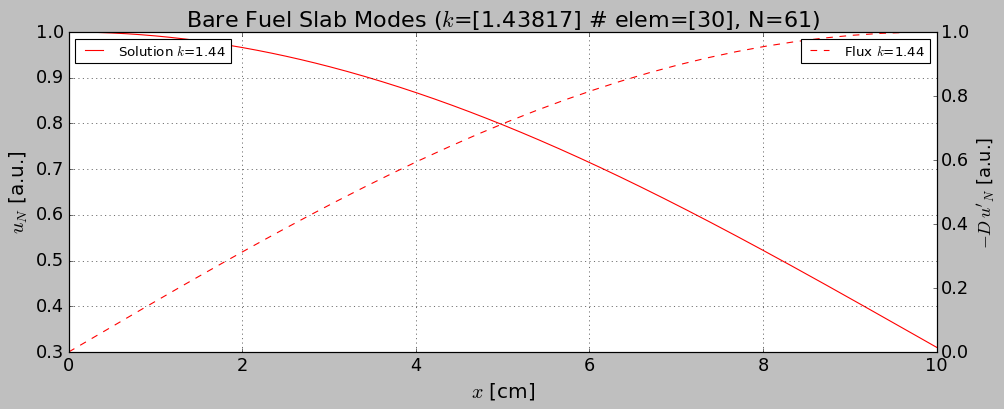

In [44]:
plot_modes(k_vec[0:1], np.abs(eigen_vec[:,0:1]))

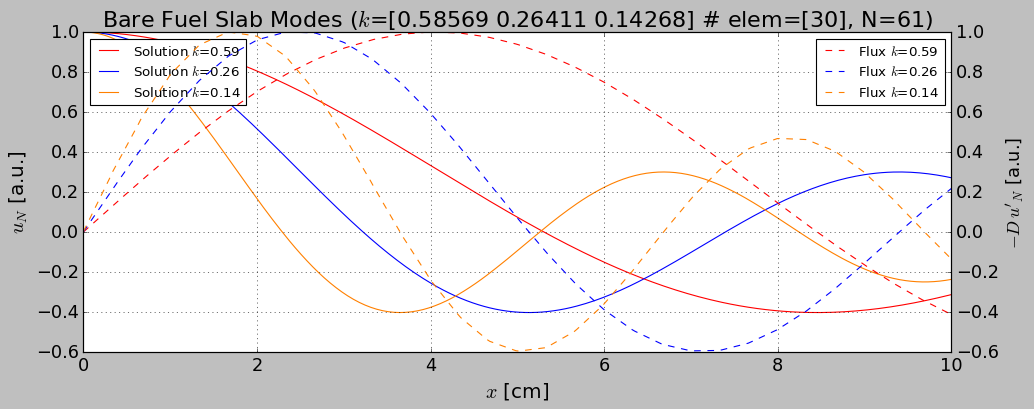

In [45]:
plot_modes(k_vec[1:4], eigen_vec[:,1:4])

### [Criticality](#toc)<a id="criticality-2"></a>
Use the adjusted $\Sigma_{fc}$ to verify the solution is critical.

#### [Data](#toc)<a id="datac-2"></a>

Solve problem with the modified parameter:

> + $\Sigma_{fc}$

*Assume all other parameters to remain the same.* This assumption is unlikely to hold because $D$ will likely change and an iterative process must be used even for this simple problem.


In [46]:
'''Sigma_f critical'''
sigma_f_fuel_critical = sigma_f_fuel / k_vec[0]
print('Sigma_f critical = %2.4e [1/cm]'%(sigma_f_fuel_critical*unit.cm))

Sigma_f critical = 6.9533e-02 [1/cm]


#### [Results](#toc)<a id="resultsc-2"></a>

Multiplication factor of the critical solution with adjusted $\Sigma_f$.

In [47]:
'''Critical Eigenvalues'''
k_vec = nu*sigma_f_fuel_critical/(lambda_vec+sigma_a_fuel)
import numpy as np
np.set_printoptions(precision=5)
print('k = ',k_vec[:5])

k =  [1.      0.40724 0.18364 0.09921 0.06104]


In [48]:
'''Probability of non-leakage does not change'''
p_nl = sigma_a_fuel / (lambda_vec[0] + sigma_a_fuel)
print('P_NL = ', p_nl)

P_NL =  0.7086026574451013
